# Analyzing 48-Hour Dataset

#### This notebook is our first full analysis of a sizable dataset (48 hours). The test took place from 13:33 local time on 07-13 until 13:41 local time on 07-15. The sensor was placed on a downstairs kitchen counter, a kitchen that was not used during the duration of the test.

## Table of Contents:
* [Import and Organize Data](#Header-1)
* [Plot Certain Hourly PM Averages](#Header-2)
* [Plot Certain Daily PM Averages](#Header-3)
* [Plot Certain Rolling PM Averages](#Header-4)
* [Plot PM Averages with Threshold](#Header-5)
* [Sample AQI Calculation](#Header-6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Import and Organize Data <a class="anchor" id="Header-1"></a>

In [2]:
directory = os.listdir(r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\AQ_test_07-13_to_07-15')
j = 0
data = [''] * len(directory)
for i in directory:
    path = r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\AQ_test_07-13_to_07-15' + "\\" + i
    data[j] = pd.read_csv(path)
    j = j + 1

table = pd.concat([data[0], data[1]], ignore_index=True)
for i in range(2,len(data)):
    table = pd.concat([table,data[i]],ignore_index=True)
    
table["datetime"] = pd.to_datetime(table["datetime"],unit='s',origin='unix')
table["datetime"] = table["datetime"].dt.tz_localize('utc').dt.tz_convert('America/New_York')

## Plot Certain Hourly PM Averages <a class="anchor" id="Header-2"></a>

### Plot Hourly PM2.5

Text(0.5, 1.0, 'Average PM2.5 Concentration Per Hour During Test')

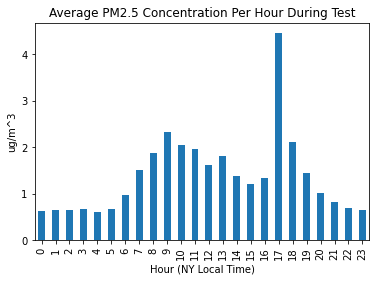

In [3]:
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM2.5 Concentration Per Hour During Test")

### Plot Hourly PM10

Text(0.5, 1.0, 'Average PM10 Concentration Per Hour During Test')

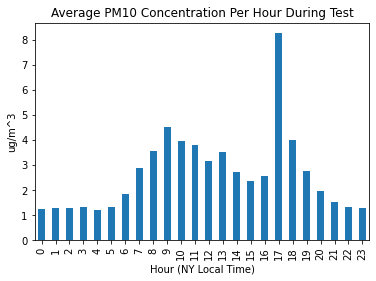

In [4]:
table.groupby(table["datetime"].dt.hour)["PM10"].mean().plot(kind='bar')
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM10 Concentration Per Hour During Test")

### Plot Hourly PM0.1

Text(0.5, 1.0, 'Average PM0.1 Concentration Per Hour During Test')

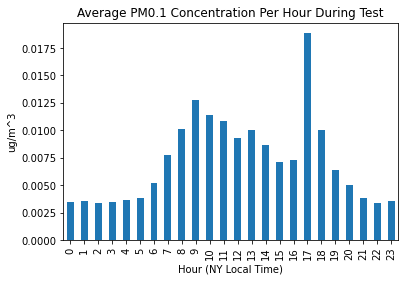

In [5]:
table.groupby(table["datetime"].dt.hour)["PM0.1"].mean().plot(kind='bar')
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM0.1 Concentration Per Hour During Test")

## Plot Certain Daily PM Averages <a class="anchor" id="Header-3"></a>

### Plot Daily PM2.5

Text(0.5, 1.0, 'Average Daily PM2.5 Concentration During Test')

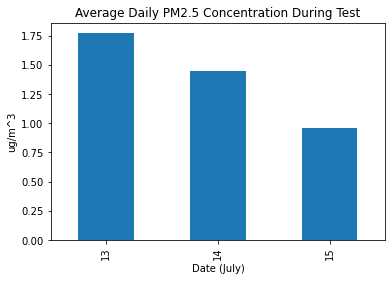

In [6]:
table.groupby(table["datetime"].dt.day)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.title("Average Daily PM2.5 Concentration During Test")

### Plot Daily PM10

Text(0.5, 1.0, 'Average Daily PM10 Concentration During Test')

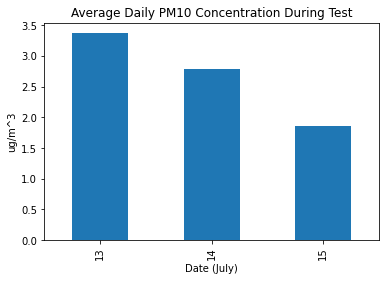

In [7]:
table.groupby(table["datetime"].dt.day)["PM10"].mean().plot(kind='bar')
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.title("Average Daily PM10 Concentration During Test")

### Plot Daily PM0.1

Text(0.5, 1.0, 'Average Daily PM0.1 Concentration During Test')

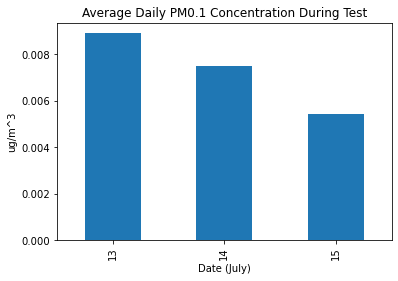

In [8]:
table.groupby(table["datetime"].dt.day)["PM0.1"].mean().plot(kind='bar')
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.title("Average Daily PM0.1 Concentration During Test")

It should be noted that the only day present that encompases a full 48 hours is 07-14. 07-13 only includes afternoon-night (13:33 onward), whereas 07-15 only includes morning-early afternoon (00:00 until 13:41).

## Plot Certain Rolling PM Averages <a class="anchor" id="Header-4"></a>

Construct Data Frames:

In [9]:
PM25Struct = pd.DataFrame(table)[['datetime','PM2.5']]
PM25Struct['Rolling Hourly Average'] = PM25Struct.rolling(3600).mean()
PM10Struct = pd.DataFrame(table)[['datetime','PM10']]
PM10Struct['Rolling Hourly Average'] = PM10Struct.rolling(3600).mean()
PM01Struct = pd.DataFrame(table)[['datetime','PM0.1']]
PM01Struct['Rolling Hourly Average'] = PM01Struct.rolling(3600).mean()

### PM2.5 Hourly Rolling Average

Text(0.5, 1.0, 'Rolling Hourly Average PM2.5 Value During Test')

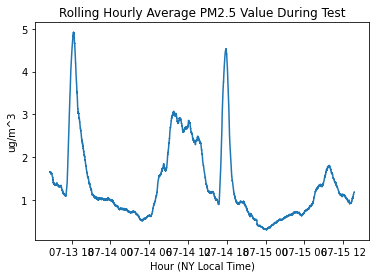

In [10]:
plt.plot(PM25Struct['datetime'],PM25Struct['Rolling Hourly Average'])
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Rolling Hourly Average PM2.5 Value During Test")

### PM10 Hourly Rolling Average

Text(0.5, 1.0, 'Rolling Hourly Average PM10 Value During Test')

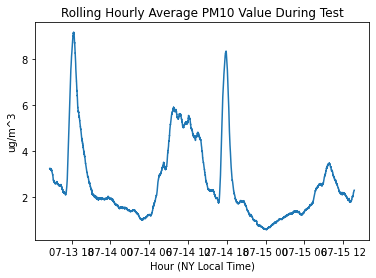

In [11]:
plt.plot(PM10Struct['datetime'],PM10Struct['Rolling Hourly Average'])
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Rolling Hourly Average PM10 Value During Test")

### PM0.1 Hourly Rolling Average

Text(0.5, 1.0, 'Rolling Hourly Average PM0.1 Value During Test')

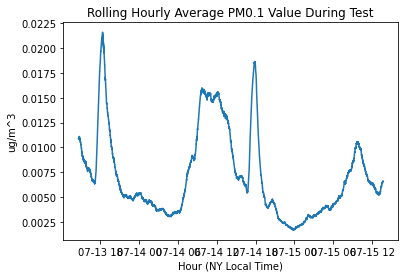

In [12]:
plt.plot(PM01Struct['datetime'],PM01Struct['Rolling Hourly Average'])
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Rolling Hourly Average PM0.1 Value During Test")

## Plot PM Averages with Threshold <a class="anchor" id="Header-5"></a>

### Hourly PM2.5 with Threshold

Text(0.5, 1.0, 'Average Hourly PM2.5 Concentration During Test')

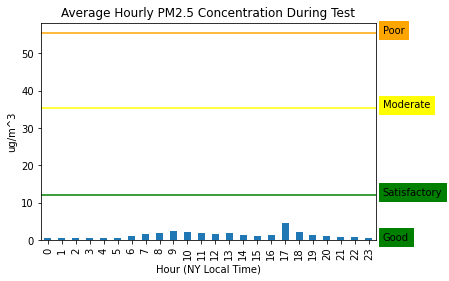

In [13]:
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.text(24,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(12, color="green")
plt.text(24,12,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(35.5, color="yellow")
plt.text(24,35.5,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(55.5, color="orange")
plt.text(24,55.5,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(150.5, color="red")
#plt.text(24,150.5,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Hourly PM2.5 Concentration During Test")

### Daily PM2.5 Concentration with Threshold

Text(0.5, 1.0, 'Average Daily PM2.5 Concentration During Test')

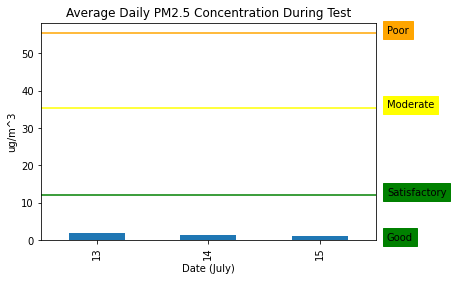

In [29]:
table.groupby(table["datetime"].dt.day)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.text(2.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(12, color="green")
plt.text(2.6,12,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(35.5, color="yellow")
plt.text(2.6,35.5,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(55.5, color="orange")
plt.text(2.6,55.5,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(150.5, color="red")
#plt.text(2.6,150.5,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Daily PM2.5 Concentration During Test")

### Hourly PM10 with Treshold

Text(0.5, 1.0, 'Average Hourly PM10 Concentration During Test')

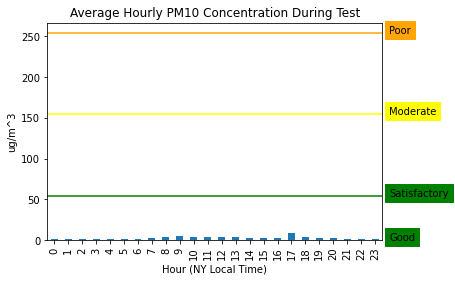

In [15]:
table.groupby(table["datetime"].dt.hour)["PM10"].mean().plot(kind='bar')
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.text(24,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(54, color="green")
plt.text(24,54,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(154, color="yellow")
plt.text(24,154,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(254, color="orange")
plt.text(24,254,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(354, color="red")
#plt.text(24,354,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Hourly PM10 Concentration During Test")

### Daily PM10 with Treshold

Text(0.5, 1.0, 'Average Daily PM10 Concentration During Test')

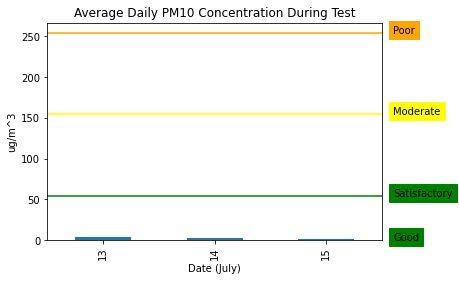

In [30]:
table.groupby(table["datetime"].dt.day)["PM10"].mean().plot(kind='bar')
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.text(2.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(54, color="green")
plt.text(2.6,54,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(154, color="yellow")
plt.text(2.6,154,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(254, color="orange")
plt.text(2.6,254,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(354, color="red")
#plt.text(2.6,354,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Daily PM10 Concentration During Test")

## AQI Calculations <a class="anchor" id="Header-6"></a>

`[(AQIHi - AQILo)/(ConcHi - ConcLo)]*(ConcIn - ConcLo) + AQILo`

`ConcIn = Input concentration for a given pollutant
ConcLo = The concentration breakpoint that is less than or equal to Conci
ConcHi = The concentration breakpoint that is greater than or equal to Conci
AQILo = The AQI value/breakpoint corresponding to ConcLo
AQIHi = The AQI value/breakpoint corresponding to ConcHi`

### PM2.5 AQI

In [28]:
ConcIn = table.groupby(table["datetime"].dt.day)["PM2.5"].mean().reset_index()
AQ_Array = [''] * len(ConcIn["PM2.5"])

j = 0
for i in ConcIn["PM2.5"]:
    i = float(i)
    if i < 12.0:                                            # AQI = "Good"
        AQIHi = 50.0
        AQILo = 0.0
        ConcHi = 12.0
        ConcLo = 0.0
    elif (i >= 12.0 and i < 35.5):                          # AQI = "Satisfactory"
        AQIHi = 100.0
        AQILo = 51.0
        ConcHi = 35.5
        ConcLo = 12.0
    elif (i >= 35.5 and i < 55.5):                          # AQI = "Moderate"
        AQIHi = 150.0
        AQILo = 101.0
        ConcHi = 55.5
        ConcLo = 35.5
    elif (i >= 55.5 and i < 150.5):                         # AQI = "Poor"
        AQIHi = 200.0
        AQILo = 151.0
        ConcHi = 150.5
        ConcLo = 55.5
    elif (i >= 150.5 and i < 250.5):                        # AQI = "Very Poor"
        AQIHi = 300.0
        AQILo = 201.0
        ConcHi = 250.5
        ConcLo = 150.5
    elif i >= 250.5:                                        # AQI = "Severe"
        AQIHi = 500.0
        AQILo = 301.0
        ConcHi = 500.5
        ConcLo = 250.5

    AQLev = (AQIHi - AQILo)
    AQLev = (AQLev)/(ConcHi - ConcLo)
    AQLev = AQLev*(i - ConcLo)
    AQLev = AQLev + AQILo
    AQLev = round(AQLev)
    AQ_Array[j] = AQLev
    j = j + 1

### Plot PM2.5 AQI

Text(0.5, 1.0, 'Daily AQI During the Test (from PM2.5)')

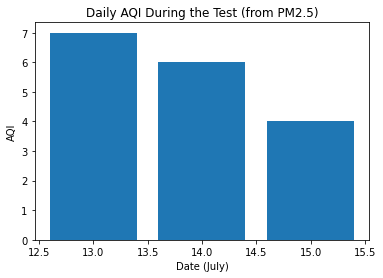

In [31]:
plt.bar(ConcIn["datetime"],AQ_Array)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.title("Daily AQI During the Test (from PM2.5)")

### Plot PM2.5 AQI with Treshold Lines

Text(0.5, 1.0, 'Daily AQI During the Test (from PM2.5)')

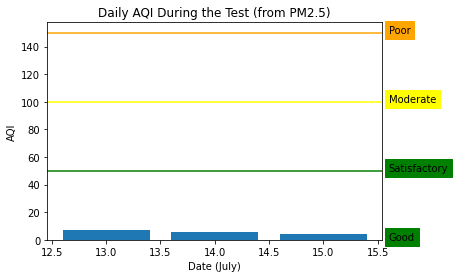

In [35]:
plt.bar(ConcIn["datetime"],AQ_Array)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.text(15.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(50, color="green")
plt.text(15.6,50,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(100, color="yellow")
plt.text(15.6,100,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(150, color="orange")
plt.text(15.6,150,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(200, color="red")
#plt.text(15.6,200,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Daily AQI During the Test (from PM2.5)")

### PM10 AQI

In [40]:
ConcIn = table.groupby(table["datetime"].dt.day)["PM10"].mean().reset_index()
AQ_Array = [''] * len(ConcIn["PM10"])

j = 0
for i in ConcIn["PM10"]:
    i = float(i)
    if i < 54.0:                                                 # AQI = "Good"
        AQIHi = 50.0
        AQILo = 0.0
        ConcHi = 54.0
        ConcLo = 0.0
    elif (i >= 54.0 and i < 154.0):                              # AQI = "Satisfactory"
        AQIHi = 100.0
        AQILo = 51.0
        ConcHi = 154.0
        ConcLo = 54.0
    elif (i >= 154.0 and i < 254.0):                             # AQI = "Moderate"
        AQIHi = 150.0
        AQILo = 101.0
        ConcHi = 254.0
        ConcLo = 154.0
    elif (i >= 254.0 and i < 354.0):                             # AQI = "Poor"
        AQIHi = 200.0
        AQILo = 151.0
        ConcHi = 354.0
        ConcLo = 254.0
    elif (i >= 354.0 and i < 424.0):                             # AQI = "Very Poor"
        AQIHi = 300.0
        AQILo = 201.0
        ConcHi = 424.0
        ConcLo = 354.0
    elif i >= 424.0:                                             # AQI = "Severe"
        AQIHi = 500.0
        AQILo = 301.0
        ConcHi = 604.0
        ConcLo = 424.0

    AQLev = (AQIHi - AQILo)
    AQLev = (AQLev)/(ConcHi - ConcLo)
    AQLev = AQLev*(i - ConcLo)
    AQLev = AQLev + AQILo
    AQLev = round(AQLev)
    AQ_Array[j] = AQLev
    j = j + 1

### Plot PM10 AQI

Text(0.5, 1.0, 'Daily AQI During the Test (from PM10)')

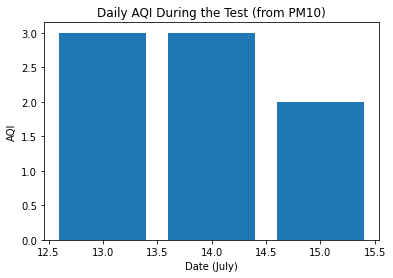

In [41]:
plt.bar(ConcIn["datetime"],AQ_Array)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.title("Daily AQI During the Test (from PM10)")

### Plot PM10 AQI with Treshold Lines

Text(0.5, 1.0, 'Daily AQI During the Test (from PM10)')

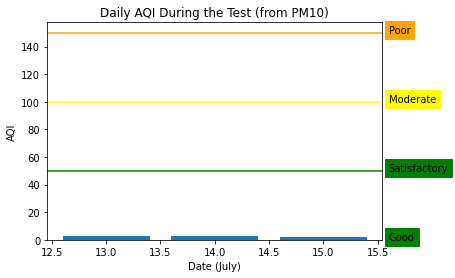

In [42]:
plt.bar(ConcIn["datetime"],AQ_Array)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.text(15.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(50, color="green")
plt.text(15.6,50,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(100, color="yellow")
plt.text(15.6,100,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(150, color="orange")
plt.text(15.6,150,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(200, color="red")
#plt.text(15.6,200,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Daily AQI During the Test (from PM10)")